In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-exam-performance-prediction/student_exam_data.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/student-exam-performance-prediction/student_exam_data.csv')

In [3]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [5]:
df.describe(include='all')

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [6]:
df['SH_Category']= pd.qcut(df['Study Hours'],3,labels=['Low','Mid','High'])
df['PES_Category']= pd.qcut(df['Previous Exam Score'],3,labels=['Low','Mid','High'])

In [7]:
df.SH_Category.value_counts()

SH_Category
Low     167
High    167
Mid     166
Name: count, dtype: int64

In [8]:
df.PES_Category.value_counts()

PES_Category
Low     167
High    167
Mid     166
Name: count, dtype: int64

In [9]:
df.groupby('SH_Category')['Previous Exam Score'].mean()

SH_Category
Low     67.507960
Mid     70.435397
High    68.816986
Name: Previous Exam Score, dtype: float64

In [10]:
df.groupby('SH_Category')['Previous Exam Score'].median()

SH_Category
Low     63.940162
Mid     71.941088
High    68.563024
Name: Previous Exam Score, dtype: float64

<Axes: xlabel='Study Hours Category', ylabel='Frequency'>

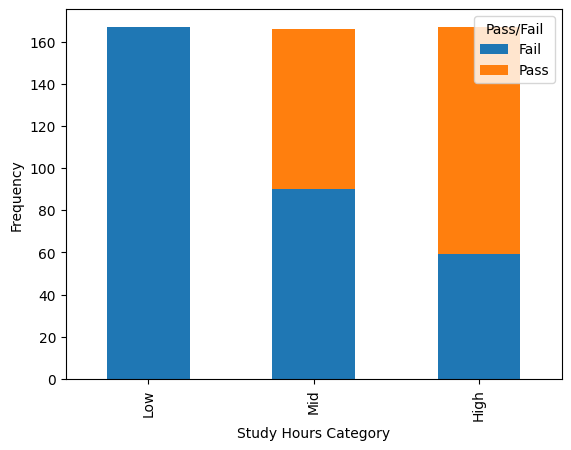

In [11]:
df['Pass/Fail'] = df['Pass/Fail'].map({0:'Fail',1:'Pass'})
df.groupby(['SH_Category','Pass/Fail']).size().unstack().plot(kind='bar',stacked=True, ylabel='Frequency', xlabel='Study Hours Category')

Hours spent studying seems to improve the likelihood of passing.

<Axes: xlabel='PES_Category'>

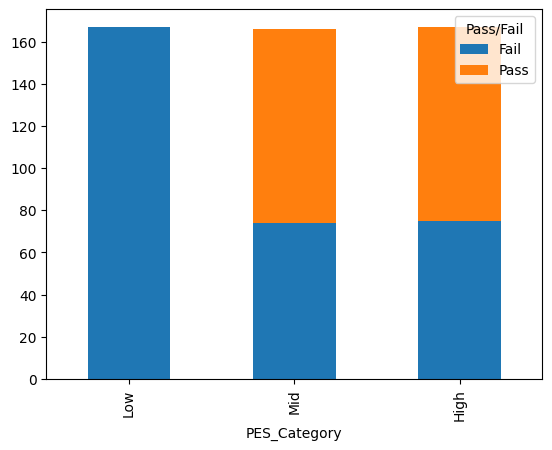

In [13]:
df.groupby(['PES_Category','Pass/Fail']).size().unstack().plot(kind='bar',stacked=True)

In [14]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail,SH_Category,PES_Category
0,4.370861,81.889703,Fail,Mid,High
1,9.556429,72.165782,Pass,High,Mid
2,7.587945,58.571657,Fail,High,Low
3,6.387926,88.827701,Pass,Mid,High
4,2.404168,81.083870,Fail,Low,High


<Axes: >

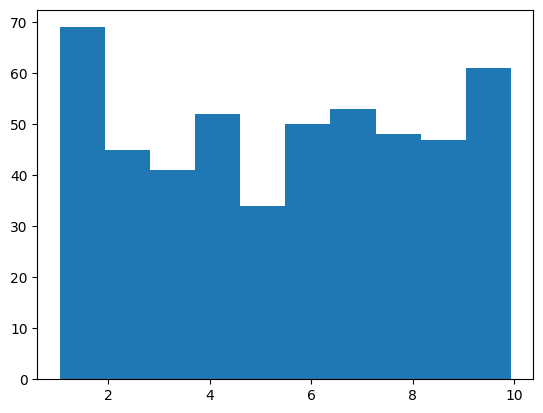

In [18]:
df['Study Hours'].hist(grid=False)